# Q2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections


Matplotlib is building the font cache; this may take a moment.


### Plot the number of posts for each profile in descending order.


In [11]:
data_prof= pd.read_csv('~/instagram_profiles.csv',delimiter='\t')
data_prof.sort_values(by='n_posts',ascending=False).head() #sort the values by the field n_post

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True


### What posts have the most and the least number of comments?

### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

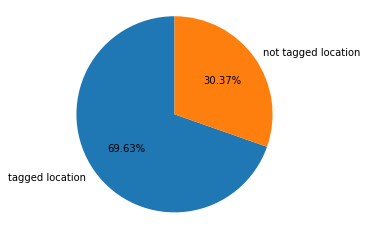

In [26]:
field=['location_id']
loc=0 #number of posts with tagged location
not_loc=0 #number of posts without tagged location
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    not_loc += chunk['location_id'].isna().sum() #to see if a post has no location 
    loc += chunk['location_id'].notna().sum() #to see in a location is tagged we check if the value is not NaN
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'tagged location', 'not tagged location'
sizes = [loc,not_loc]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### How many posts include only photos? How many also have videos?

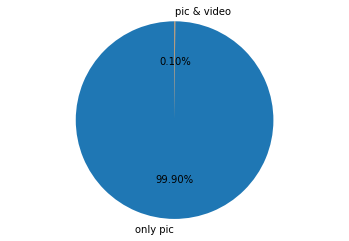

In [39]:
pic=[]
both=[]
field=['post_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.post_type.dropna(inplace=True)
    pic.append(chunk.loc[chunk['post_type']==1,'post_id'].tolist())  
    both.append(chunk.loc[chunk['post_type']==3,'post_id'].tolist())  
        
pic2=[y for el in pic for y in el]
both2=[y for el in both for y in el]
pic3=len(pic2)
both3=len(both2)        
labels = 'only pic', 'pic & video'
sizes = [pic3,both3]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [ ]:
def get_posts(profile_id_given):
    post=[]
    field=['profile_id','post_id']
    for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
        chunk.dropna(inplace=True)
        if profile_id_given in chunk['profile_id'].values:
            post.append(chunk.loc[chunk['profile_id'] == profile_id_given,'post_id'].tolist())
    post2=[y for el in post for y in el]
    return post2

#Mi ero resa contro che prendevo solo la prima riga, ho corretto la funzione =)

## [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

### Plot the top 10 most popular users in terms of followers and their number of posts.

<AxesSubplot:xlabel='profile_name'>

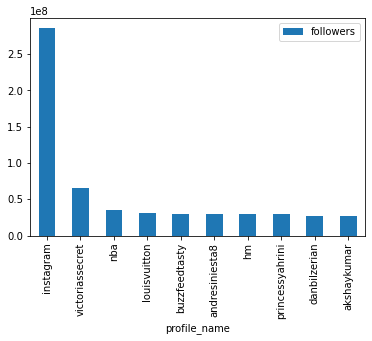

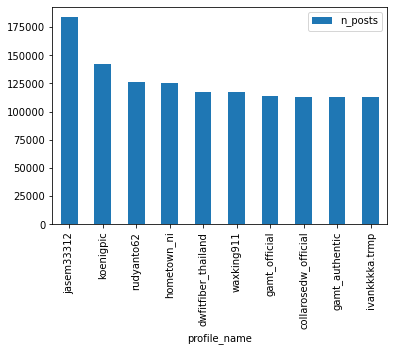

In [14]:
top_follower= data_prof.sort_values(by='followers', ascending=False).head(10)
top_post= data_prof.sort_values(by='n_posts', ascending=False).head(10)
top_follower.plot.bar(x = 'profile_name', y='followers')
top_post.plot.bar(x = 'profile_name', y='n_posts')

### Who is the most influential user?

In [15]:
most_influencer=top_follower['profile_name'].iloc[0]
most_influencer

'instagram'

### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [22]:
loc=[]
profile_id_given=2.502532e+07
field=['profile_id','location_id'] # field that will be load in the chunk dataframe
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(inplace=True) #not considering NaN values
    if profile_id_given in chunk['profile_id'].values:
        loc.append(chunk.loc[chunk['profile_id'] == profile_id_given,'location_id'].tolist()) # loc will be a nested list
location_list=[ id_loc for el in loc for id_loc in el]
location_list
cont=collections.Counter(location_list)
#the most frequent areas are
print('The most frequent areas are:',cont.most_common(3))

The most frequent areas are: [(5332856.0, 1), (587387369.0, 1), (877066659067597.0, 1)]


In [24]:
cont #not sure about this one

Counter({5332856.0: 1,
         587387369.0: 1,
         877066659067597.0: 1,
         350021298.0: 1,
         524311966.0: 1,
         711348463.0: 1,
         2193902.0: 1,
         1021722711.0: 1,
         927381377419380.0: 1,
         873036082898953.0: 1,
         592482131.0: 1,
         248557125.0: 1,
         261122325.0: 1,
         288135278570406.0: 1,
         343191797.0: 1,
         336785864.0: 1,
         229123116.0: 1,
         261338470931883.0: 1,
         132977180705703.0: 1,
         1019347558.0: 1,
         220618956.0: 1,
         1021254794.0: 1,
         2361753.0: 1,
         238999763.0: 1,
         272320632.0: 1,
         1014896644.0: 1,
         429264.0: 1,
         259695682.0: 1,
         243602932.0: 1,
         7399112.0: 1,
         591298383.0: 1,
         838523900.0: 1,
         1011688667.0: 1,
         9519563.0: 1})

### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

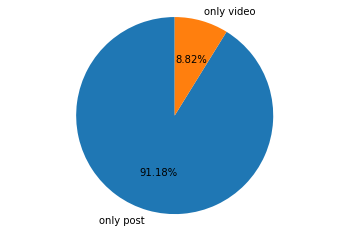

In [34]:
post=[]
video=[]

profile_id_given=2.502532e+07
field=['post_id','profile_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(inplace=True)
    if profile_id_given in chunk['profile_id'].values:
        post.append(chunk.loc[(chunk['profile_id'] == profile_id_given) & (chunk['post_type']==1),'post_id'].tolist())  
        video.append(chunk.loc[(chunk['profile_id'] == profile_id_given) & (chunk['post_type']==2),'post_id'].tolist())  
        
post2=[y for el in post for y in el]
video2=[y for el in video for y in el]
post3=len(post2)
video3=len(video2)
labels = 'only post', 'only video'
sizes = [post3,video3]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
post

post_id     profile_id  post_type
Ss3ULFBQeM  25025320    1           NaN
dtype: float64

### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.